用基本Newtow法(取$\alpha=1$)求函数的极小值，教材62页例3.2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)


def f(x1, x2):
    return 3*x1**2 + +3*x2**2 - (x1**2)*x2

In [12]:
iter = 0
x0 = np.array([0, 0])
eps = 0.000001


def descent(x):
    return np.array([6*x[0]-2*x[0]*x[1], 6*x[1]-x[0]**2])


def hessian(x):
    return np.array([[6-2*x[1], -2*x[0]], [-2*x[0], 6]])


a = 1

分别从三个初始点计算，(1.5,1.5), (-2,4), (0,3)

In [13]:
x0 = np.array([1.5, 1.5])
x = x0
path1 = []
while iter < 100:
    g = descent(x)
    h = hessian(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    # ax1.plot(x[0], x[1], 'o-')
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(np.linalg.inv(h), g)
    x = x + a*d
    iter += 1

0 [1.5 1.5] 6.75
1 [-3.75 -2.25] 39.375
2 [ 0.625 -3.125] 19.140624999999915
3 [0.31901607 0.00135752] 1.9132302995411783
4 [-0.00197124 -0.0171715 ] 0.1030328568314055
5 [-1.12184284e-05 -6.40261553e-07] 6.731058498807207e-05
6 [-2.39416386e-12 -2.09755138e-11] 1.2585308288120692e-10


In [14]:
x0 = np.array([-2, 4])
x = x0
path2 = []
iter = 0
while iter < 100:
    g = descent(x)
    h = hessian(x)
    print(iter, x, f(x[0], x[1]), np.linalg.norm(g, ord=np.inf))
    # ax2.plot(x[0], x[1], 'o-')
    path2.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(np.linalg.inv(h), g)
    x = x + a*d
    iter += 1

0 [-2  4] 44 20.0
1 [-4.  2.] 27.999999999999993 7.999999999999998
2 [-4.30769231  3.07692308] 26.974965862539825 0.6627218934911241
3 [-4.24392489  3.0011387 ] 26.999991479768845 0.009665146942126057
4 [-4.24264112  3.00000034] 26.999999999999076 2.9227811353393918e-06
5 [-4.24264069  3.        ] 27.0 3.019806626980426e-13


In [15]:
x0 = np.array([0, 3])
x = x0
path3 = []
iter = 0
while iter < 100:
    g = descent(x)
    h = hessian(x)
    print(iter, x, f(x[0], x[1]), np.linalg.norm(g, ord=np.inf))
    # ax3.plot(x[0], x[1], 'o-')
    path3.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(np.linalg.inv(h), g) # Error: Singular matrix
    x = x + a*d
    iter += 1

# 此初始点计算得的 G(x0)为奇异矩阵，Newton方法失败

0 [0 3] 27 18.0


LinAlgError: Singular matrix

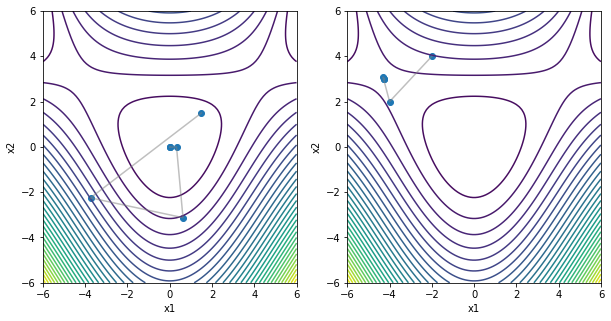

In [16]:
# 前两个点的可视化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.contour(X1, X2, f(X1, X2), levels=30)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax2.contour(X1, X2, f(X1, X2), levels=30)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')


ax1.scatter(*zip(*path1), marker='o')
ax1.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)

ax2.scatter(*zip(*path2), marker='o')
ax2.plot(*zip(*path2), linestyle='-', color='gray', alpha=0.5)

plt.show()